In [1]:
import pandas as pd
df = pd.read_csv("/content/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [5]:
import numpy as np
x=np.array(x)
y=np.array(y).reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [8]:
from sklearn.linear_model import Lasso

In [9]:
from sklearn.linear_model import LassoCV
alphas=np.logspace(-3,3,7)
lasso_cv=LassoCV(alphas=alphas,cv=5)
lasso_cv.fit(x_train,y_train)
print("Best alpha:",lasso_cv.alpha_)

Best alpha: 0.001


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
best_ridge=Lasso(alpha=lasso_cv.alpha_)
best_ridge.fit(x_train,y_train)
y_pred=best_ridge.predict(x_train)

In [11]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)

Mean Squared Error: 21.521510718492532
Root Mean Squared Error: 4.63912822828735
R2 Score: 0.7111714316191495


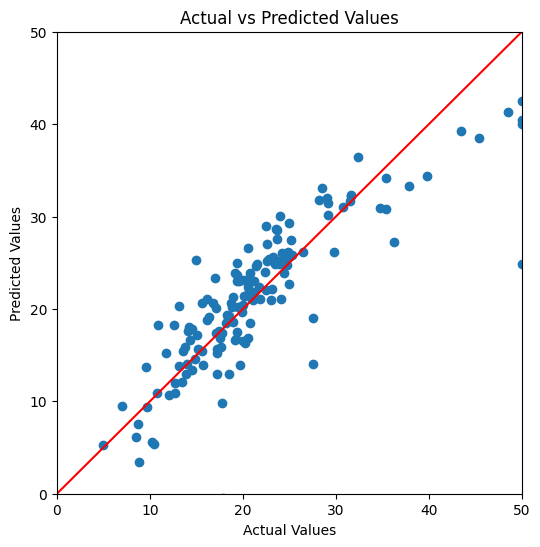

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
max_value=max(y_test.max(),y_pred.max())
plt.plot([0,max_value],[0,max_value],color='red')
plt.xlim([0,max_value])
plt.ylim([0,max_value])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [18]:
best_ridge=Lasso(alpha=lasso_cv.alpha_)
best_ridge.fit(x_train,y_train)
y_pred=best_ridge.predict(x_train)

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_train,y_pred)
r2=r2_score(y_train,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)

Mean Squared Error: 22.54555429526183
Root Mean Squared Error: 4.74821590655499
R2 Score: 0.7434989248646879


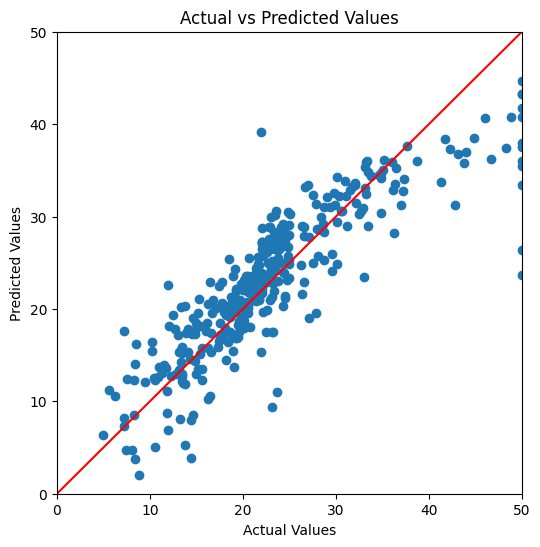

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_train,y_pred)
max_value=max(y_train.max(),y_pred.max())
plt.plot([0,max_value],[0,max_value],color='red')
plt.xlim([0,max_value])
plt.ylim([0,max_value])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()